# Центральная предельная теорема 

## Построение гистограммы выборки из распределения Лапласа и построение теоретической функции распределения

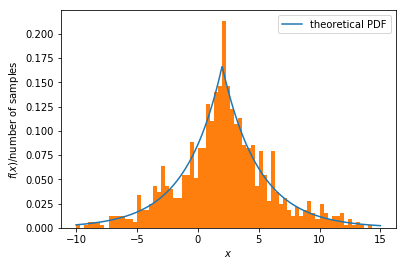

In [173]:
from scipy.stats import laplace
import scipy.stats as sts
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

laplace = laplace(loc = 2,scale = 3) # loc и scale - параметры сдвига и масштаба
samples = laplace.rvs(size = 1000) # генерация выборки объема 1000
x = np.linspace(-10,15,1000)
pdf = laplace.pdf(x) #вычисляем значения плотности распределения от выборки

#строим гистрограмму выборки и теоретическую функцию распределения
plt.plot(x, pdf, label='theoretical PDF')
plt.hist(samples, bins = 75, range=(-10,15), normed=True)
plt.ylabel('$f(x)$/number of samples')
plt.xlabel('$x$')
plt.legend(loc='best')

 Гистограмма выборки хорошо совпадает с теоретической оценкой плотности вероятности рассматриваемого распределения.

## Оценка распределения выборочного среднего случайной величины при разных объёмах выборок
Согласно ЦПТ выборочные средние будут приближаться нормальным распределением. Распределение Лапласа было задано с $\mu = 2$ и $\sigma = 3$

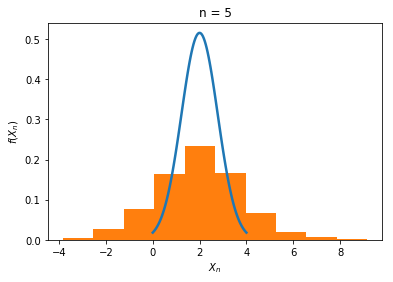

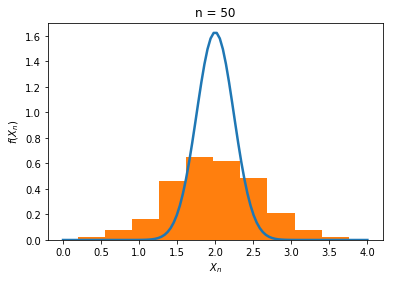

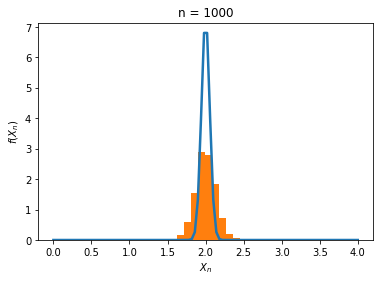

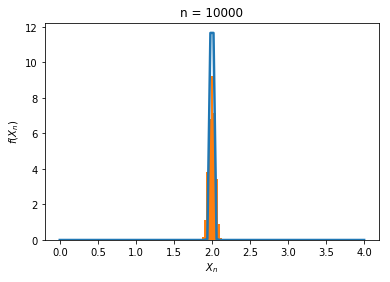

In [188]:
#функция построения графика теоретической плотности вероятности и гистограммы выборочных средних.
def generator(n): 
    means = []
    for i in range(1000):
        samples = laplace.rvs(n)
        samples_mean = np.mean(samples)
        means.append(samples_mean) #выборочные средние
    
    # расчитывание теоритеческой плотности вероятности для нормального распределения согласно ЦПТ
    mu = 2 
    sigma = math.sqrt(3./n)
    norm_rv = sts.norm(loc=mu, scale=sigma)
    x = np.linspace(0,4,100)
    pdf = norm_rv.pdf(x)
    
    #графики
    plt.plot(x, pdf, linewidth = 2.5)
    plt.hist(means, normed = True)
    plt.xlabel('${X}_n$')
    plt.ylabel('$f({X}_n)$')
    plt.title('n = %d' % n)
    plt.show()

for n in [5, 50, 1000, 10000]:
    generator(n)

Как видно из графиков, распределение выборочных средних Лапласа плохо приближается нормальным при небольшом количестве выборок. Увеличив количество выборок до 10000, распределение стало приближаться гораздо лучше.